<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_19%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv("assignment3_creditcard.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# 회귀분석을 위해 독립변수X와 종속변수Y를 분리
X = data.drop(['Class'], axis=1)
y = data[['Class']]

In [ ]:
# Logit()을 이용해 회귀분석
# 수정 전
# R-squared: 0.785 
# AIC: 667, BIC: 906 (두 값 모두 낮을수록 모델의 적합도가 좋음)

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()

print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.010618
         Iterations 12
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.785   
Dependent Variable: Class            AIC:              667.0108
Date:               2023-01-31 14:34 BIC:              906.6634
No. Observations:   28678            Log-Likelihood:   -304.51 
Df Model:           28               LL-Null:          -1415.5 
Df Residuals:       28649            LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     12.0000                                    
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const      -7.6615    0.2828  -27.0926  0.0000  -8.2158  -7.1073
V1          0.0717    0.0732    0.9791  0.3275  -0.0718   0.2151
V2         -0.0685   

In [ ]:
# 수정 후
# R-squared: 0.775 (수정 전보다 0.01 감소하지만, 모델의 적합도 및 P > |Z|를 고려했을 때 감안할 수 있음)
# AIC: 655, BIC: 730 (수정 전보다 감소하므로 모델의 적합도가 좋음) 

# P > |Z|, 모든 feature가 유의수준 0.05을 넘지 않음
feature = ['V4', 'V8', 'V10', 'V12', 'V14', 'V21', 'V22', 'V27']
X = data[feature]
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()

print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.011120
         Iterations 11
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.775   
Dependent Variable: Class            AIC:              655.7921
Date:               2023-01-31 14:36 BIC:              730.1671
No. Observations:   28678            Log-Likelihood:   -318.90 
Df Model:           8                LL-Null:          -1415.5 
Df Residuals:       28669            LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const      -7.3581    0.2185  -33.6725  0.0000  -7.7864  -6.9298
V4          0.6194    0.0724    8.5539  0.0000   0.4775   0.7613
V8         -0.1793   

In [ ]:
# 로지스틱 회귀모델 학습 후 accuracy_score & f1_score & confusion_matrix 계산
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
score_f1 = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("accuracy_score:", np.round(score, 3))
print("f1_score:", np.round(score_f1, 3))
print("confusion_matrix\n", confusion_matrix)

accuracy_score: 0.998
f1_score: 0.846
confusion_matrix
 [[5691    3]
 [   9   33]]


##### 1. 정확도는 전체 데이터 중, 실제 정답과 동일한 데이터 수의 비율
##### 2. F1 score는 Precision 과 Recall을 조화평균한 값
##### -> F1_score가 정확도보다 훨씬 낮은 이유는 데이터 불균형으로 인한 문제

<AxesSubplot:ylabel='Frequency'>

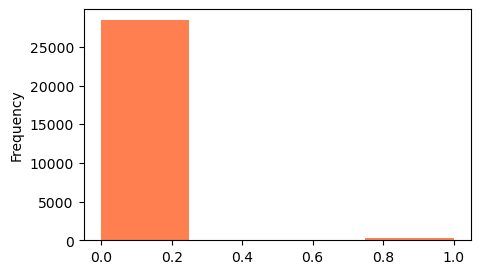

In [ ]:
# label 분포가 균등한 지 확인
data['Class'].plot(kind='hist', bins=4, color='coral', figsize=(5, 3))

<AxesSubplot:ylabel='Frequency'>

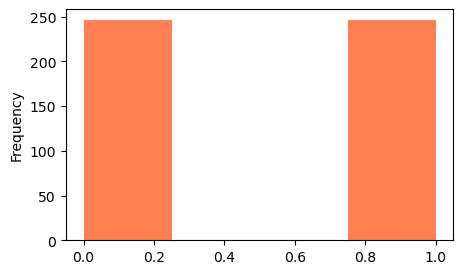

In [ ]:
# 데이터가 불균등하여 정확도 의존성이 강해지므로 Class 0에서 Class 1의 수 만큼 랜덤하게 선택 
import random

class_0 = data.index[data['Class'] == 0].tolist()
class_1 = data.index[data['Class'] == 1].tolist()

sample_0 = random.sample(class_0, len(class_1))
new_data = data.loc[sample_0 + class_1]

new_data['Class'].plot(kind='hist', bins=4, color='coral', figsize=(5, 3))

In [ ]:
# 데이터 균형을 맞춘 데이터 셋 생성
new_X = new_data.drop(['Class'], axis=1)
new_y = new_data[['Class']]

print(new_X.shape)
print(new_y.shape)

(492, 28)
(492, 1)


In [ ]:
# 로지스틱 회귀모델 학습 후 accuracy_score & f1_score & confusion_matrix 계산
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
score_f1 = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("accuracy_score:", np.round(score, 3))
print("f1_score:", np.round(score_f1, 3))
print("confusion_matrix\n", confusion_matrix)

accuracy_score: 0.919
f1_score: 0.92
confusion_matrix
 [[45  3]
 [ 5 46]]
